<a href="https://colab.research.google.com/github/Ramam2002/Image---Classification/blob/main/ML_MINOR_JAN_SriRamam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit
!pip install pyngrok

In [ ]:
!pip install bing-image-downloader

%cd /content
!mkdir img              #creating a directory to store images

In [ ]:
from bing_image_downloader import downloader

downloader.download("pretty flowers", limit = 50, output_dir = 'img',adult_filter_off = True)
downloader.download("super cars", limit = 50, output_dir = 'img',adult_filter_off = True)
downloader.download("bicycles", limit = 50, output_dir = 'img',adult_filter_off = True)




[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/cc/0b/10/cc0b10d98f0b004f2d1c5589f13dadc0--dried-flowers-beautiful-flowers.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.wedding-venues.co.uk/sites/default/files/Perfect-Christmas-Wedding-Theme-calliehobbsphotography.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://hative.com/wp-content/uploads/2014/11/flower-nail-designs/27-pretty-flower-nail-designs.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://thewedding-concierge.com/wp-content/uploads/2015/05/watercolor3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.architecturendesign.net/wp-content/uploads/2015/12/AD-Floral-Christmas-Tree-Decorating-Ideas-12.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://ww1.prweb.com/prfiles/2013/07/25/10965381/Wildflower-Wedding-Centerpi.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://

In [ ]:
# Libraries and methods needed

import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from pyngrok import ngrok

In [65]:
target = []
imgs = []
flat_data = []

DATADIR = '/content/img'
Categories = ['bicycles','pretty flowers','super cars']

for Categ in Categories:
    class_num = Categories.index(Categ)
    path = os.path.join(DATADIR,Categ)
    for img in os.listdir(path):
      img_array = imread(os.path.join(path,img))
      resized = resize(img_array,(200,200,3))
      flat_data.append(resized.flatten())
      imgs.append(resized)
      target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
imgs = np.array(imgs)


In [66]:
#training and testing data

x_train, x_test, y_train, y_test = train_test_split(flat_data,target,test_size = 0.25,random_state = 129)

In [67]:
param_grid = [{'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]
svc = svm.SVC(probability = True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [68]:
#checking Accuracy

y_pred = clf.predict(x_test)
print(y_pred)
print(y_test)
print('\n')

print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))


[1 2 0 1 2 2 1 1 0 2 2 1 0 0 2 1 1 2 1 2 2 0 0 0 1 2 0 0 2 1 0 2 1 2 0 2 2
 0 1]
[1 0 0 1 2 2 1 1 0 0 2 1 0 0 2 1 1 2 1 2 2 0 0 0 2 2 0 0 2 2 0 2 1 2 0 2 2
 0 2]


0.8717948717948718
[[12  0  0]
 [ 0  9  3]
 [ 2  0 13]]


In [69]:
pickle.dump(clf,open('img_model.p','wb')) #saving the model
model = pickle.load(open('img_model.p','rb'))

enter URL : https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHItLb-gaSaJzm7IGvS4JHRHnrakjYcGbwsg&usqp=CAU
predicted output : super cars


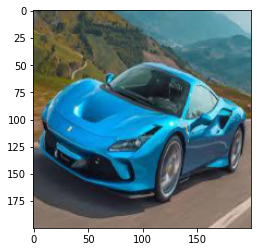

In [70]:
f_data = []
url = input('enter URL : ')
i = imread(url)
i_resized = resize(i,(200,200,3))
f_data.append(i_resized.flatten())
f_data = np.array(f_data)
plt.imshow(i_resized)
y_out = model.predict(f_data)
y_out = Categories[y_out[0]]
print(f'predicted output : {y_out}')